In [55]:
from transformers import pipeline
import datasets
import nltk
from nltk.corpus import stopwords

In [36]:
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
import torch
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import config
import torch.nn.functional as F

In [4]:
import random
import pandas as pd
from IPython.display import display, HTML
import numpy as np
import os

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

!pip install chart_studio
!pip install textstat

import numpy as np 
import pandas as pd 

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords


# Visualisation libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')


# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# File system manangement
import os
# Pytorch
import torch

#Transformers
from transformers import BertTokenizer

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')


In [6]:
#Training data

train = pd.read_csv('train.csv')
test = pd.read_csv('101test.csv')
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

# First few rows of the training dataset
train.head()


Training data shape:  (27481, 4)
Testing data shape:  (100, 3)


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [7]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))


Sentence_1 = 'Life well spent is life good'
Sentence_2 = 'Life is an art and it is good so far'
Sentence_3 = 'Life is good'

    
print(jaccard(Sentence_1,Sentence_2))
print(jaccard(Sentence_1,Sentence_3))

0.2727272727272727
0.6


In [8]:
#Training data
train = pd.read_csv('train.csv')
test = pd.read_csv('101test.csv')
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

# First few rows of the training dataset
train.head()

# First few rows of the testing dataset
test.head()

Training data shape:  (27481, 4)
Testing data shape:  (100, 3)


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


,num,full_text,sentiment
0,0,Just posted a photo @ Missouri Western State U...,1
1,1,So with the numbers of LAW STUDENTS in univers...,3
2,2,It's so hard to make friends after university!...,5
3,3,Former University of Kansas professor found gu...,1
4,4,Congratulations to one of our high flying scho...,5


In [10]:
print(train.shape)

(27481, 4)


In [11]:
#Missing values in training set
train.isnull().sum()
#Missing values in test set
test.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

num          0
full_text    0
sentiment    0
dtype: int64

In [12]:
# Dropping missing values
train.dropna(axis = 0, how ='any',inplace=True) ;

In [13]:
# Positive tweet
print("Positive Tweet example :",train[train['sentiment']=='positive']['text'].values[0])
#negative_text
print("Negative Tweet example :",train[train['sentiment']=='negative']['text'].values[0])
#neutral_text
print("Neutral tweet example  :",train[train['sentiment']=='neutral']['text'].values[0])

Positive Tweet example : 2am feedings for the baby are fun when he is all smiles and coos
Negative Tweet example :  Sooo SAD I will miss you here in San Diego!!!
Neutral tweet example  :  I`d have responded, if I were going


In [14]:
train['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [15]:
train['sentiment'].value_counts(normalize=True)

neutral     0.404549
positive    0.312300
negative    0.283151
Name: sentiment, dtype: float64

In [16]:
train['sentiment'].value_counts(normalize=True).iplot(kind='bar',
                                                      yTitle='Percentage', 
                                                      linecolor='black', 
                                                      opacity=0.7,
                                                      color='red',
                                                      theme='pearl',
                                                      bargap=0.6,
                                                      gridcolor='white',
                                                     
                                                      title='Distribution of Sentiment column in the training set')

In [17]:
test['sentiment'].value_counts(normalize=True).iplot(kind='bar',
                                                      yTitle='Percentage', 
                                                      linecolor='black', 
                                                      opacity=0.7,
                                                      color='red',
                                                      theme='pearl',
                                                      bargap=0.6,
                                                      gridcolor='white',
                                                      title='Distribution  of Sentiment column in the test set')

In [18]:
# text preprocessing helper functions

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [19]:
# Applying the cleaning function to both test and training datasets
train['text_clean'] = train['text'].apply(str).apply(lambda x: text_preprocessing(x))
test['text_clean'] = test['full_text'].apply(str).apply(lambda x: text_preprocessing(x))

In [20]:
train.head()

,textID,text,selected_text,sentiment,text_clean
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,id have responded if i were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldnt they put them on the relea...


In [21]:
train['text_len'] = train['text_clean'].astype(str).apply(len)
train['text_word_count'] = train['text_clean'].apply(lambda x: len(str(x).split()))

In [22]:
train.head(5)
train['sentimentword'] = train['sentiment'].map({1:"negative", 2:"somewhat negative", 3:"neutral", 4:"somewhat positive",5:"positive"}).apply(str).apply(lambda x: text_preprocessing(x))


,textID,text,selected_text,sentiment,text_clean,text_len,text_word_count
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,id have responded if i were going,33,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego,42,10
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,22,5
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,29,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldnt they put them on the relea...,67,13


In [23]:
train.head(5)

,textID,text,selected_text,sentiment,text_clean,text_len,text_word_count,sentimentword
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,id have responded if i were going,33,7,nan
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego,42,10,nan
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,22,5,nan
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,29,5,nan
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldnt they put them on the relea...,67,13,nan


In [24]:
pos = train[train['sentiment']=='positive']
neg = train[train['sentiment']=='negative']
neutral = train[train['sentiment']=='neutral']

In [25]:
pos['text_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='full_text length',
    linecolor='black',
    color='red',
    yTitle='count',
    title='Positive Text Length Distribution')

neg['text_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='full_text length',
    linecolor='black',
    color='green',
    yTitle='count',
    title='Negative Text Length Distribution')

neutral['text_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='full_text length',
    linecolor='black',
    yTitle='count',
    title='Neutral Text Length Distribution')

In [26]:
trace0 = go.Box(
    y=pos['text_len'],
    name = 'Positive Text',
    marker = dict(
        color = 'red',
    )
)

trace1 = go.Box(
    y=neg['text_len'],
    name = 'Negative Text',
    marker = dict(
        color = 'green',
    )
)

trace2 = go.Box(
    y=neutral['text_len'],
    name = 'Neutral Text',
    marker = dict(
        color = 'orange',
    )
)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Length of the text"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Length of the text of different polarities")

In [27]:
pos['text_word_count'].iplot(
    kind='hist',
    bins=50,
    xTitle='text length',
    linecolor='black',
    color='red',
    yTitle='count',
    title='Positive Text word count')

neg['text_word_count'].iplot(
    kind='hist',
    bins=50,
    xTitle='text length',
    linecolor='black',
    color='green',
    yTitle='count',
    title='Negative Text word count')
neutral['text_word_count'].iplot(
    kind='hist',
    bins=50,
    xTitle='text length',
    linecolor='black',
    yTitle='count',
    title='Neutral Text word count')

In [28]:
trace0 = go.Box(
    y=pos['text_word_count'],
    name = 'Positive Text',
    marker = dict(
        color = 'red',
    )
)

trace1 = go.Box(
    y=neg['text_word_count'],
    name = 'Negative Text',
    marker = dict(
        color = 'green',
    )
)

trace2 = go.Box(
    y=neutral['text_word_count'],
    name = 'Neutral Text',
    marker = dict(
        color = 'orange',
    )
)
data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "word count of the text"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "word count of the text of different polarities")

In [29]:
#source of code : https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [30]:
pos_unigrams = get_top_n_words(pos['text_clean'],20)
neg_unigrams = get_top_n_words(neg['text_clean'],20)
neutral_unigrams = get_top_n_words(neutral['text_clean'],20)



#for word, freq in top_unigrams:
    #print(word, freq)
df1 = pd.DataFrame(pos_unigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black',color='red', title='Top 20 Unigrams in positve text',orientation='h')

df2 = pd.DataFrame(neg_unigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='green',title='Top 20 Unigrams in negative text',orientation='h')

df3 = pd.DataFrame(neutral_unigrams, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 Unigrams in neutral text',orientation='h')

In [31]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [32]:
pos_bigrams = get_top_n_gram(pos['text_clean'],(2,2),20)
neg_bigrams = get_top_n_gram(neg['text_clean'],(2,2),20)
neutral_bigrams = get_top_n_gram(neutral['text_clean'],(2,2),20)



#for word, freq in top_bigrams:
    #print(word, freq)
df1 = pd.DataFrame(pos_bigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black',color='red', title='Top 20 Bigrams in positve text',orientation='h')

df2 = pd.DataFrame(neg_bigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='green',title='Top 20 Bigrams in negative text',orientation='h')

df3 = pd.DataFrame(neutral_bigrams, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 Bigrams in neutral text',orientation='h')

In [33]:
pos_trigrams = get_top_n_gram(pos['text_clean'],(3,3),20)
neg_trigrams = get_top_n_gram(neg['text_clean'],(3,3),20)
neutral_trigrams = get_top_n_gram(neutral['text_clean'],(3,3),20)

df1 = pd.DataFrame(pos_trigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black',color='red', title='Top 20 Trigrams in positve text',orientation='h')

df2 = pd.DataFrame(neg_trigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='green',title='Top 20 Trigrams in negative text',orientation='h')

df3 = pd.DataFrame(neutral_trigrams, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 Trigrams in neutral text',orientation='h')

In [34]:
positive_text = train[train['sentiment'] == 'positive']['selected_text']
negative_text = train[train['sentiment'] == 'negative']['selected_text']
neutral_text = train[train['sentiment'] == 'neutral']['selected_text']

In [35]:
# Positive text
print("Positive Text example :",positive_text.values[0])
#negative_text
print("Negative Tweet example :",negative_text.values[0])
#neutral_text
print("Neutral tweet example  :",neutral_text.values[0])

Positive Text example : fun
Negative Tweet example : Sooo SAD
Neutral tweet example  : I`d have responded, if I were going


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='sentiment', ylabel='count'>

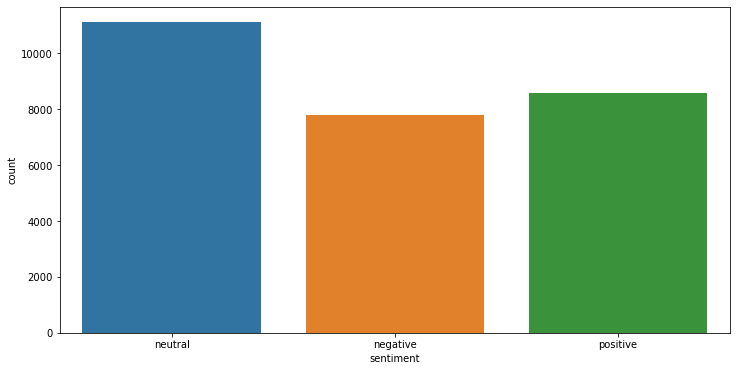

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train)

In [42]:
temp = train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


In [43]:

fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [44]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [45]:
results_jaccard=[]

for ind,row in train.iterrows():
    sentence1 = row.text
    sentence2 = row.selected_text

    jaccard_score = jaccard(sentence1,sentence2)
    results_jaccard.append([sentence1,sentence2,jaccard_score])

In [46]:
jaccard = pd.DataFrame(results_jaccard,columns=["text","selected_text","jaccard_score"])
train = train.merge(jaccard,how='outer')

In [47]:
train['Num_words_ST'] = train['selected_text'].apply(lambda x:len(str(x).split())) #Number Of words in Selected Text
train['Num_word_text'] = train['text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
train['difference_in_words'] = train['Num_word_text'] - train['Num_words_ST'] #Difference in Number of words text and Selected Text

In [48]:
train.head()

,textID,text,selected_text,sentiment,text_clean,text_len,text_word_count,sentimentword,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,id have responded if i were going,33,7,nan,1.000000,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego,42,10,nan,0.200000,2,10,8
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,22,5,nan,0.166667,2,5,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,29,5,nan,0.600000,3,5,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldnt they put them on the relea...,67,13,nan,0.214286,3,14,11


hist_data = [train['Num_words_ST'],train['Num_word_text']]

group_labels = ['Selected_Text', 'Text']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,show_curve=False)
fig.update_layout(title_text='Distribution of Number Of words')
fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [52]:

train['temp_list'] = train['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,to,5190
1,I,4842
2,the,4303
3,a,3427
4,my,2503
5,i,2298
6,and,2164
7,you,2072
8,is,1944
9,in,1864


In [53]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [58]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
train['temp_list'] = train['temp_list'].apply(lambda x:remove_stopword(x))

In [59]:
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,I`m,940
2,good,843
3,get,741
4,like,727
5,love,723
6,day,627
7,go,605
8,got,493
9,don`t,489
10,going,488


In [60]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

most comment words

In [62]:
train['temp_list1'] = train['text'].apply(lambda x:str(x).split()) #List of words in every row for text
train['temp_list1'] = train['temp_list1'].apply(lambda x:remove_stopword(x)) #Removing Stopwords

In [63]:
Positive_sent = train[train['sentiment']=='positive']
Negative_sent = train[train['sentiment']=='negative']
Neutral_sent = train[train['sentiment']=='neutral']

In [64]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,I,684
1,love,556
2,good,539
3,Happy,371
4,happy,264
5,great,258
6,day,208
7,fun,197
8,nice,192
9,thanks,185


In [65]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [66]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,miss,337
2,I`m,243
3,****,231
4,sad,224
5,hate,199
6,bad,192
7,sorry,181
8,like,155
9,don`t,152
10,feel,149


In [67]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

In [68]:
raw_text = [word for word_list in train['temp_list1'] for word in word_list]

In [72]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in train[train.sentiment != sentiment]['temp_list1']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in train[train.sentiment == sentiment]['temp_list1']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [73]:
Unique_Positive= words_unique('positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,"Thanks,",18
1,amazing.,14
2,Lovely,12
3,Moms,11
4,Watched,10
5,thnx,9
6,hilarious,9
7,Goodmorning,8
8,successful,8
9,"sweet,",8


In [74]:
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Positive Words')
fig.show()

<Figure size 1152x720 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1672512b0>,
 [Text(1.0449557827150195, 0.3436093889439594, 'Thanks,'),
  Text(0.6987701554266662, 0.8495412114106019, 'amazing.'),
  Text(0.25017776348177617, 1.0711727622840568, 'Lovely'),
  Text(-0.19313700849048954, 1.0829118597334433, 'Moms'),
  Text(-0.5722634028604338, 0.9394224809672147, 'Watched'),
  Text(-0.8495412195885499, 0.6987701454841925, 'thnx'),
  Text(-1.0253063570599366, 0.398430513606177, 'hilarious'),
  Text(-1.09725992806377, 0.07759284931931958, 'Goodmorning'),
  Text(-1.0754211845448651, -0.23123424450569455, 'successful'),
  Text(-0.9683921034659021, -0.5217439352257828, 'sweet,'),
  Text(-0.7846510779224366, -0.7709232685002824, 'welcome.'),
  Text(-0.5387532982107281, -0.9590333068601227, 'gr8'),
  Text(-0.2690433539447588, -1.066590677672628, 'Loves'),
  Text(3.86210371883183e-08, -1.0999999999999994, 'adorable'),
  Text(0.26904342884082766, -1.0665906587803826, 'STAR'),
  Text(0.5217439805594887, -0.9683920790413045, 'Day!!'

Text(0.5, 1.0, 'DoNut Plot Of Unique Positive Words')

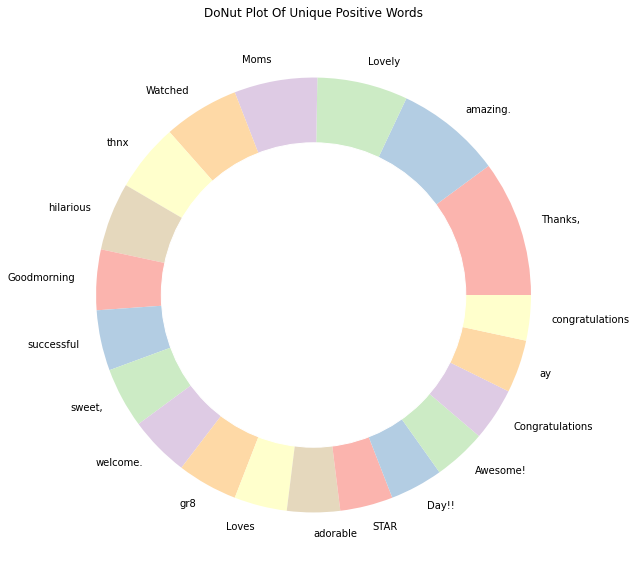

In [75]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

In [76]:
Unique_Negative= words_unique('negative', 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


,words,count
0,sad...,11
1,:@,10
2,ugh!,9
3,disappointing,8
4,dead.,8
5,bored...,8
6,hurts!,8
7,sad..,7
8,allergic,7
9,saddest,7


<Figure size 1152x720 with 0 Axes>

([<matplotlib.patches.Wedge at 0x179b740a0>,
 [Text(1.0060257800760561, 0.4448731614992782, 'sad...'),
  Text(0.38706909080211943, 1.0296492213106467, ':@'),
  Text(-0.3870691631041564, 1.0296491941306263, 'ugh!'),
  Text(-0.9274197833906085, 0.591517155605581, 'disappointing'),
  Text(-1.0992121293823403, -0.04162564856841908, 'dead.'),
  Text(-0.880027965442698, -0.6599627110972148, 'bored...'),
  Text(-0.3478284577184751, -1.0435589892292565, 'hurts!'),
  Text(0.2679091632458267, -1.0668761316333406, 'sad..'),
  Text(0.7704224980968779, -0.7851427732751326, 'allergic'),
  Text(1.0616150943299947, -0.2880510223740176, 'saddest')])

Text(0.5, 1.0, 'DoNut Plot Of Unique Negative Words')

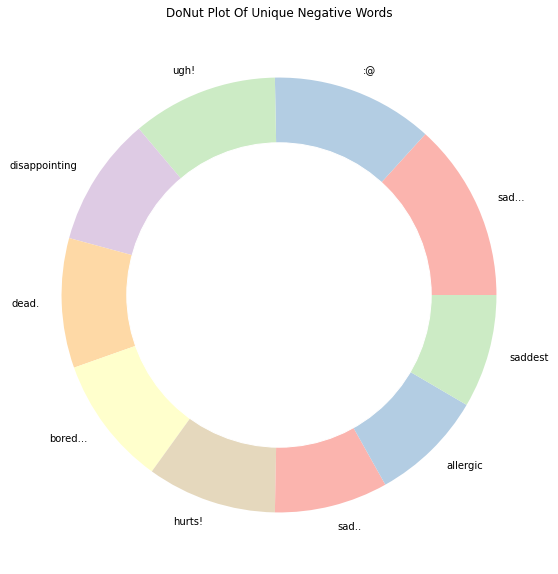

In [77]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.rcParams['text.color'] = 'black'
plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Negative Words')
plt.show()

In [80]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = '2.png'